<center>
<h2>O objetivo é encontrar os valores de θ = [θ0, θ1, θ2]T que minimizam o erro quadrático medio, ou seja que minimizam </h2>
</center>

In [1]:
from IPython.display import Latex
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from mpl_toolkits.mplot3d import Axes3D

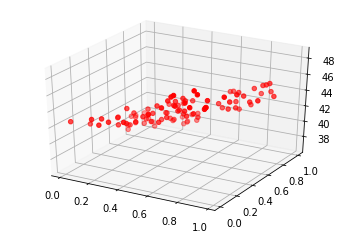

In [2]:
#Carrega os dados
x = np.load("Ex3X.npy")
y = np.load("Ex3y.npy")

#Plot X,Y
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.T[0],x.T[1],y, c='r', marker='o')
plt.show()

#Criando tabela de '1' para manter a dimensão X igual a theta
x = np.array([(1,i[0],i[1]) for i in x])



<h2><center>Minimizar:</h2></center>
\begin{equation}
    y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}
\end{equation}

<h2><center>Função de custo:</h2></center>

\begin{equation*}
   \frac{1}{n}\sum(y_i - \theta^{T}x_i)^{2}
\end{equation*}



In [3]:
#Função de custo

def  calc_cost(x,y,theta):
    return (1/len(y))*np.sum(np.square(y-x.dot(theta.T)))

    

<h2><center>Descida do Gradiente:</h2></center>

\begin{equation}
 \forall j \in \{0,1,2\}
\end{equation}

\begin{equation}
 \theta_j = \theta_j - \alpha \frac{1}{m} \sum^{m}_{k = 1}(h_{\theta}(x_i) - y_i)
\end{equation}

In [4]:
#Descida do gradiente
def gradient_descent(x,y,theta,learning_rate=0.01,iterations=100):
    n = len(y)
    cost = np.zeros(iterations)
    for i in range(iterations):
        prediction = np.dot(x,theta) 
        theta = theta -(learning_rate/n)*np.sum(x.T.dot((prediction - y)))
        cost[i] = calc_cost(x, y, theta)
        
    return theta,cost

In [5]:
#Stochastic Gradient Descent
def SGD(x,y,theta,learning_rate=0.05,iterations=1000):
    n = len(y)
    cost = np.zeros(iterations)
    for i in range(iterations):
        rand_int = np.random.randint(0,n)
        x_i = x[rand_int].reshape(1,x.shape[1])
        y_i = y[rand_int].reshape(1,1)

        prediction = np.dot(x_i,theta) 
        theta = theta -(learning_rate/n)*np.sum(x_i.T.dot((prediction - y_i)))
        cost[i] += calc_cost(x_i,y_i,theta)
        
    return theta,cost 

In [6]:
#Minibatch
def mini_batch(x,y,theta,learning_rate=0.01,iterations=200):
    n = len(y)
    cost = np.zeros(iterations)
    for i in range(iterations):
        c = 0
        for j in range(10):
            rand_int = np.random.randint(0,n)
            x_i = x[rand_int].reshape(1,x.shape[1])
            y_i = y[rand_int].reshape(1,1)

            prediction = np.dot(x_i,theta) 
            theta = theta -(learning_rate/n)*np.sum(x_i.T.dot((prediction - y_i)))
            c += calc_cost(x_i,y_i,theta)
        
        cost[i] = c
        
    return theta,cost 
        

In [7]:
#1 batch gradient descent

#    0.01
learning_rate = 0.01

theta,cost1 = gradient_descent(x,y,np.zeros(3),learning_rate,100)
finalCost = calc_cost(x,y,theta)
print("Learning Rate = 0.01: %.2E" % finalCost) 

#    0.001
learning_rate = 0.001

theta,cost2 = gradient_descent(x,y,np.zeros(3),learning_rate,100)
finalCost = calc_cost(x,y,theta)
print("Learning Rate = 0.001: %.2E" % finalCost) 

#    0.00005
learning_rate = 0.00005
theta,cost3 = gradient_descent(x,y,np.zeros(3),learning_rate,100)
finalCost = calc_cost(x,y,theta)
print("Learning Rate = 0.00005: %.2E" % finalCost) 

Learning Rate = 0.01: 3.99E+101
Learning Rate = 0.001: 7.42E+03
Learning Rate = 0.00005: 8.80E+03


<center>
    <h3>Pode-se perceber que houve grande variação na descida do gradiente com a mudança do leraning rate</h3>
    <hr>
    <ul>    
        <li>No primeiro caso (α = 0.01) houve o estouro pois o salto era grande demais e acabou ocorrendo o "bouncing" na região de mínimo</li>
        <li>No segundo caso (α = 0.001) a theta convergiu para o mínimo com um learning rate adequado</li>
        <li>No terceiro caso (α = 0.00005) o learning rate era muito baixo para permitir a convergência com 100 iterações</li>
    </ul>
</center>

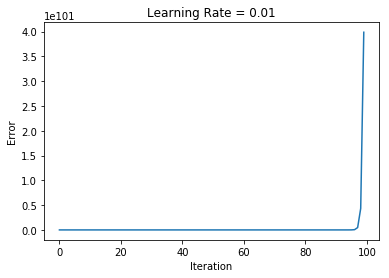

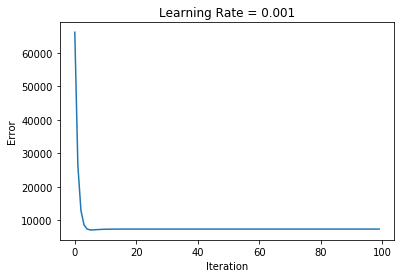

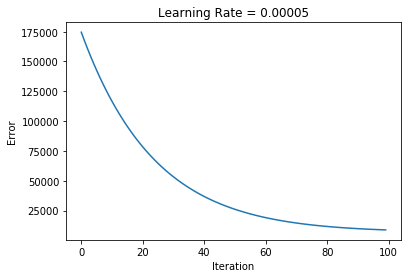

In [8]:
fig = plt.figure()

plt.title("Learning Rate = 0.01")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(np.arange(len(cost1)),cost1)
plt.show()

plt.title("Learning Rate = 0.001")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(np.arange(len(cost1)),cost2)
plt.show()

plt.title("Learning Rate = 0.00005")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(np.arange(len(cost1)),cost3)
plt.show()

In [9]:
#2 SGD
learning_rate = 0.05
theta,cost4 = SGD(x,y,np.zeros(3),learning_rate,1000)
finalCost = calc_cost(x,y,theta)
print("SGD: Learning Rate = 0.05: %.2E" % finalCost) 

SGD: Learning Rate = 0.05: 9.65E+03


<center>
    <h3>SGD</h3>
    <hr>
    <ul>
        <li>No SGD houve bastante ruído, já que ao tomar um elemento aleatório, nem todos os passos iam na direção correta</li>
    </ul>
</center>

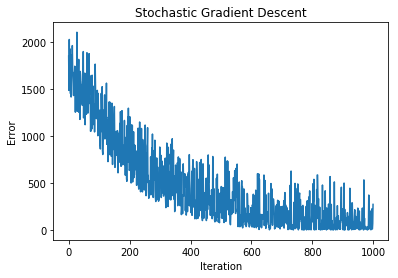

In [10]:
plt.title("Stochastic Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(np.arange(len(cost4)),cost4)
plt.show()

In [11]:
#3 Mini batch GD
learning_rate = 0.05
theta,cost5 = mini_batch(x,y,np.zeros(3),learning_rate,200)
finalCost = calc_cost(x,y,theta)
print("SGD: Learning Rate = 0.05: %.2E" % finalCost) 

SGD: Learning Rate = 0.05: 7.16E+03


<center>
    <h3>Mini Batch</h3>
    <hr>
    <ul>
        <li>O mini batch, apesar de ruidoso se mostrou bem menos melhor que o SGD para este caso</li>
        <li>Ao tomar um número maior de elementos, os erros individuais se cancelam, permitindo uma convergência mais rápida e menos</li>
    </ul>
</center>

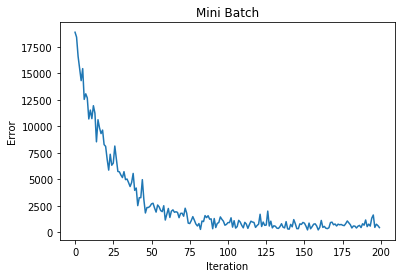

In [12]:
plt.title("Mini Batch")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(np.arange(len(cost5)),cost5)
plt.show()